In [1]:
import numpy as np
import pandas as pd
from pyIClab import (
    IonExchanger, Column, Eluent, SwitchingValve, PEEKTubing,
    SampleLoop, DSM_SimpleEquilibriums, ContaminatedPhreeqcSuppressorBeta,
    Detector, IonChromatograph, DSM_SEConstrutor
    )
from pyIClab.engines.models import _total_mix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def local_post_distrubute(model, /, *,
    mix_n: int,               
    ):
    
    for _ in range(mix_n):
        _total_mix(model)
        
class LocalConstructor(DSM_SEConstrutor):
    
    def set_post_distribute(self):
        
        return local_post_distrubute
    
    def set_post_distribute_params(self):
        
        N = self.set_N()
        length = self.host.length.to('cm').magnitude
        target_N = round(length / 0.04)
        mix_n = round(np.log2(2*N / target_N)) + 1
        
        return {'mix_n': mix_n}

In [3]:
as18 = IonExchanger.load('as18-20240731.dat', directory='db')

In [4]:
column = Column(
    name='AS18-4mm',
    length='25 cm',
    ID='4 mm'
    )
column.pack(as18)

profile = {
    'OH-':(
        (5, 10),
        (13, 25),
        (15, 25),
        (15, 10),
        (20, 10),
        ),   
}

eluent = Eluent(name='EG', profile=profile)
tb = SampleLoop('PEEK', V='0.21 mL') # hold-up volume
sixport = SwitchingValve.SixPort()
loop = SampleLoop('Loop', '25 uL')
suppressor = ContaminatedPhreeqcSuppressorBeta('Suppressor', 'anion')
detector = Detector('Detector')

eluent.assemble(tb)
sixport.assemble(0, tb)
sixport.assemble(1, column)
sixport.assemble([2, 5], loop)
column.assemble(suppressor)
suppressor.assemble(detector)

ic = IonChromatograph('Gradient-Test', ('OH-',), lockon=sixport)

In [5]:
solution = {
    'Cl-': '1e-8 mM', # Very tiny concentration, can be ignored
    'OH-': '1e-4 mM',
    }
solution

{'Cl-': '1e-8 mM', 'OH-': '1e-4 mM'}

In [6]:
ic.inject(solution, 'loop')
ic.injection_table

,accessory,Cl[-1],OH[-1],K[+1]
0,"<Loop ""Loop"" 25 μL>",1.000000e-08,0.0001,0.0001


In [7]:
commands = '''
    0.0 min, sixport, inject
    0.5 min, sixport, load
    '''
ic.reset_commands(commands)
ic.set_ModelConstructor(LocalConstructor, column)

In [8]:
df = {}
levels = ['1e-4', '5e-3', '1e-2', '1.5e-2',]

for l in levels:
    suppressor._CO2_level = float(l)
    ic.go(tmax='20 min')
    df[l] = detector.get_signals(signal_type='conductivity')

17:29:27 Activating <IC System "Gradient-Test">...
    17:29:27 Configurating model paratemers...
    17:29:28 Building models...
    17:29:30 Injecting Samples...
        0.0 min: Execute Command -- <Valve "SixPort"> INJECT


Processing Cl[-1] on <Loop "PEEK" 210 μL>:   0%|          | 0/5000 [00:00<?, ?it/s]

Processing Cl[-1] on <Loop "Loop" 25 μL>:   0%|          | 0/5000 [00:00<?, ?it/s]

Processing Cl[-1] on <Column "AS18-4mm" (4.0 × 250 mm)>:   0%|          | 0/1214 [00:00<?, ?it/s]

Suppressing eluent on <Suppressor "Suppressor">...:   0%|          | 0/2000 [00:00<?, ?it/s]

        0.5 min: Execute Command -- <Valve "SixPort"> LOAD


Processing Cl[-1] on <Loop "PEEK" 210 μL>:   0%|          | 0/195000 [00:00<?, ?it/s]

Processing Cl[-1] on <Column "AS18-4mm" (4.0 × 250 mm)>:   0%|          | 0/47309 [00:00<?, ?it/s]

Suppressing eluent on <Suppressor "Suppressor">...:   0%|          | 0/78000 [00:00<?, ?it/s]

17:30:03 IC simulation finished...



Calculating eluent conductivity on <Detector "Detector">...:   0%|          | 0/11999 [00:00<?, ?it/s]

17:30:07 Activating <IC System "Gradient-Test">...
    17:30:07 Configurating model paratemers...
    17:30:08 Building models...
    17:30:10 Injecting Samples...
        0.0 min: Execute Command -- <Valve "SixPort"> INJECT


Processing Cl[-1] on <Loop "PEEK" 210 μL>:   0%|          | 0/5000 [00:00<?, ?it/s]

Processing Cl[-1] on <Loop "Loop" 25 μL>:   0%|          | 0/5000 [00:00<?, ?it/s]

Processing Cl[-1] on <Column "AS18-4mm" (4.0 × 250 mm)>:   0%|          | 0/1214 [00:00<?, ?it/s]

Suppressing eluent on <Suppressor "Suppressor">...:   0%|          | 0/2000 [00:00<?, ?it/s]

        0.5 min: Execute Command -- <Valve "SixPort"> LOAD


Processing Cl[-1] on <Loop "PEEK" 210 μL>:   0%|          | 0/195000 [00:00<?, ?it/s]

Processing Cl[-1] on <Column "AS18-4mm" (4.0 × 250 mm)>:   0%|          | 0/47309 [00:00<?, ?it/s]

Suppressing eluent on <Suppressor "Suppressor">...:   0%|          | 0/78000 [00:00<?, ?it/s]

17:30:44 IC simulation finished...



Calculating eluent conductivity on <Detector "Detector">...:   0%|          | 0/11999 [00:00<?, ?it/s]

17:30:47 Activating <IC System "Gradient-Test">...
    17:30:47 Configurating model paratemers...
    17:30:48 Building models...
    17:30:50 Injecting Samples...
        0.0 min: Execute Command -- <Valve "SixPort"> INJECT


Processing Cl[-1] on <Loop "PEEK" 210 μL>:   0%|          | 0/5000 [00:00<?, ?it/s]

Processing Cl[-1] on <Loop "Loop" 25 μL>:   0%|          | 0/5000 [00:00<?, ?it/s]

Processing Cl[-1] on <Column "AS18-4mm" (4.0 × 250 mm)>:   0%|          | 0/1214 [00:00<?, ?it/s]

Suppressing eluent on <Suppressor "Suppressor">...:   0%|          | 0/2000 [00:00<?, ?it/s]

        0.5 min: Execute Command -- <Valve "SixPort"> LOAD


Processing Cl[-1] on <Loop "PEEK" 210 μL>:   0%|          | 0/195000 [00:00<?, ?it/s]

Processing Cl[-1] on <Column "AS18-4mm" (4.0 × 250 mm)>:   0%|          | 0/47309 [00:00<?, ?it/s]

Suppressing eluent on <Suppressor "Suppressor">...:   0%|          | 0/78000 [00:00<?, ?it/s]

17:31:25 IC simulation finished...



Calculating eluent conductivity on <Detector "Detector">...:   0%|          | 0/11999 [00:00<?, ?it/s]

17:31:28 Activating <IC System "Gradient-Test">...
    17:31:28 Configurating model paratemers...
    17:31:29 Building models...
    17:31:31 Injecting Samples...
        0.0 min: Execute Command -- <Valve "SixPort"> INJECT


Processing Cl[-1] on <Loop "PEEK" 210 μL>:   0%|          | 0/5000 [00:00<?, ?it/s]

Processing Cl[-1] on <Loop "Loop" 25 μL>:   0%|          | 0/5000 [00:00<?, ?it/s]

Processing Cl[-1] on <Column "AS18-4mm" (4.0 × 250 mm)>:   0%|          | 0/1214 [00:00<?, ?it/s]

Suppressing eluent on <Suppressor "Suppressor">...:   0%|          | 0/2000 [00:00<?, ?it/s]

        0.5 min: Execute Command -- <Valve "SixPort"> LOAD


Processing Cl[-1] on <Loop "PEEK" 210 μL>:   0%|          | 0/195000 [00:00<?, ?it/s]

Processing Cl[-1] on <Column "AS18-4mm" (4.0 × 250 mm)>:   0%|          | 0/47309 [00:00<?, ?it/s]

Suppressing eluent on <Suppressor "Suppressor">...:   0%|          | 0/78000 [00:00<?, ?it/s]

17:32:07 IC simulation finished...



Calculating eluent conductivity on <Detector "Detector">...:   0%|          | 0/11999 [00:00<?, ?it/s]

<Axes: xlabel='time'>

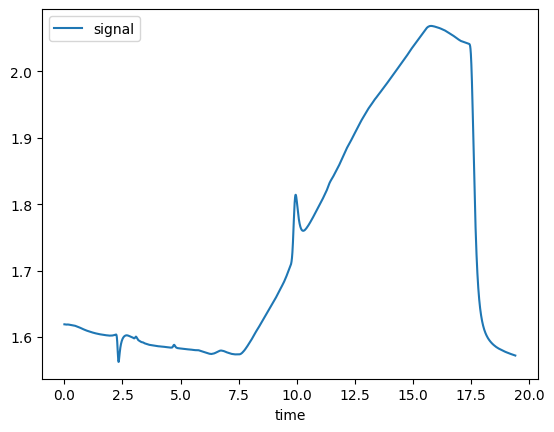

In [9]:
df_exp = pd.read_csv('db/DI-gradient A-ECD-total.txt',
    sep='\s+',
    skiprows=43,
    names=['time', 'step', 'signal'],
    )[['time', 'signal']]
df_exp.plot(x='time', y='signal')

Text(0, 0.5, 'Conductivity, μS/cm')

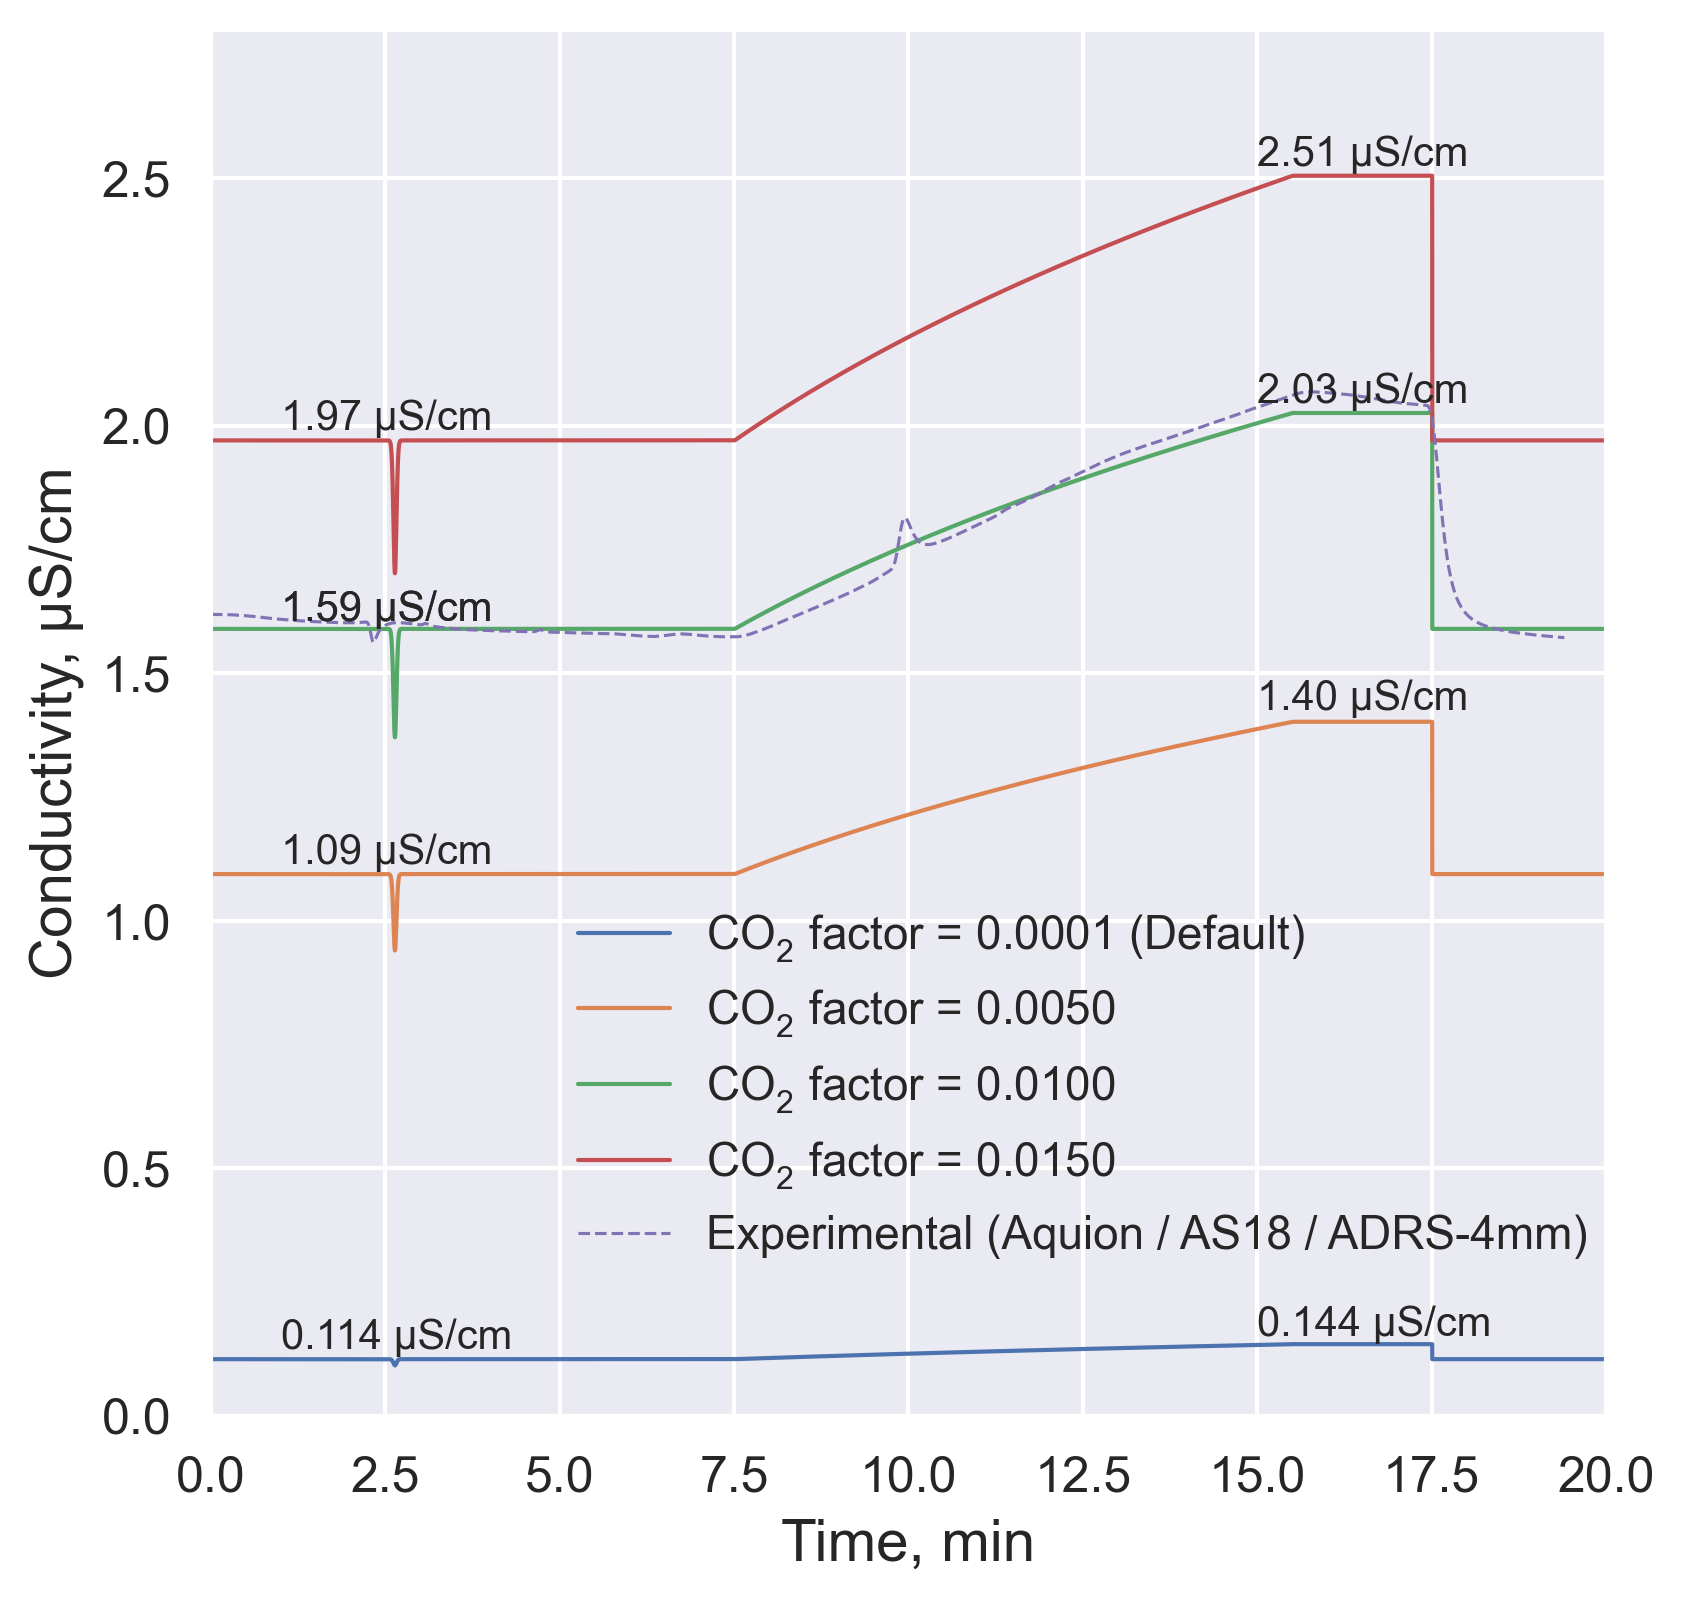

In [10]:
custom_rcconfig = {
    'figure.figsize': [6, 6],
    'figure.dpi': 300.0,
    'axes.linewidth': 1.0,
    'axes.labelsize': 14,
    'font.family': 'Arial',
    'lines.linewidth': 1.0,
    'legend.frameon': False,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'mathtext.default': 'regular',
    'mathtext.fontset': 'dejavusans',
    'text.usetex': False,
    }
sns.set()
plt.rcParams.update(custom_rcconfig)

fig, ax = plt.subplots()

for level, df_pred in df.items():
    ax.plot('time', 'signal',
        data=df_pred,
        label='CO$_{2}$ factor = ' + f'{float(level):.4f}' + (' (Default)' if level == '1e-4' else ''),
        )
    
ax.plot('time', 'signal',
    data=df_exp,
    linestyle='--',
    linewidth=.75,
    label='Experimental (Aquion / AS18 / ADRS-4mm)',
    )
ax.legend(loc=(.25, .1))

ax.text(1.0, .12, '0.114 μS/cm',
    va='bottom',
    ha='left',
    fontsize=10,
    )
ax.text(15, .145, '0.144 μS/cm',
    va='bottom',
    ha='left',
    fontsize=10,
    )
ax.text(1.0, 1.1, '1.09 μS/cm',
    va='bottom',
    ha='left',
    fontsize=10,
    )
ax.text(15, 1.41, '1.40 μS/cm',
    va='bottom',
    ha='left',
    fontsize=10,
    )
ax.text(1.0, 1.59, '1.59 μS/cm',
    va='bottom',
    ha='left',
    fontsize=10,
    )
ax.text(1.0, 1.59, '1.59 μS/cm',
    va='bottom',
    ha='left',
    fontsize=10,
    )
ax.text(15, 2.03, '2.03 μS/cm',
    va='bottom',
    ha='left',
    fontsize=10,
    )
ax.text(1.0, 1.975, '1.97 μS/cm',
    va='bottom',
    ha='left',
    fontsize=10,
    )
ax.text(15, 2.51, '2.51 μS/cm',
    va='bottom',
    ha='left',
    fontsize=10,
    )

ax.set(xlim=(0, 20), ylim=(0, 2.8))
ax.set_xlabel('Time, min')
ax.set_ylabel('Conductivity, μS/cm')